In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support as scores
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np



In [13]:
pluto = pd.read_csv('/home/oliver/data/pluto/pluto_disc.csv')

/home/oliver/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
    cov = [
    'age'
    ,'build_alter_gap'
    ,'alterage'
    ,'alterage_squared'   
    ,'alterage_cubed'
    ,'elevator'
    ,'commercial'
    ,'garage'
    ,'storage'
    ,'basement'
    ,'waterfront'
    ,'frontage'
    ,'block_assmeblage'
    ,'cooperative'
    ,'conv_loft_wh'
    ,'tenament'
    ,'garden'
    ,'semi_fireproof'
    ,'fireproof'
    ,'luxury'
    ,'artist_res'
    ,'units_per_building'
    ,'floors'
    ,'floors_squared'
    ,'zip_avg_num_buildings'
    ,'pcvpu_l1'
    ,'pcvpu_l2'
    ,'pcvpu_l3'
    ,'avg_block_pcvpu_l1'
    ,'avg_block_pcvpu_l2'
    ,'avg_block_pcvpu_l3'
    ,'avg_neighbor1_pcvpu_l1'
    ,'avg_neighbor1_pcvpu_l2'
    ,'avg_neighbor1_pcvpu_l3'
    ,'avg_neighbor2_pcvpu_l1'
    ,'avg_neighbor2_pcvpu_l2'
    ,'avg_neighbor2_pcvpu_l3'
    ,'avg_neighbor3_pcvpu_l1'
    ,'avg_neighbor3_pcvpu_l2'
    ,'avg_neighbor3_pcvpu_l3'
    ,'avg_neighbor4_pcvpu_l1'
    ,'avg_neighbor4_pcvpu_l2'
    ,'avg_neighbor4_pcvpu_l3'
    ,'avg_zip_pcvpu_l1'
    ,'avg_zip_pcvpu_l2'
    ,'avg_zip_pcvpu_l3'
    ]

In [15]:
# Function for creating dataframes from a SQL query
def get_data(year_train, year_test, cov):
    """
    Function to return data from a train and test SQL query
    """
    global df_train, df_test, X_train, X_test, y_train, y_test, covariates

    # List of columns to be used as covariates in the model

    df_train = pluto[pluto['year']<=year_train].dropna()
    df_test = pluto[pluto['year']==year_test].dropna()

    X_train = df_train[cov]
    y_train = df_train['pcvpu_target']

    X_test = df_test[cov]
    y_test = df_test['pcvpu_target']
    return df_train, df_test, X_train, X_test, y_train, y_test

In [16]:
# Create a random forest classifier object
# warm_start = True allows the model to be trained on new data without having to retrain the entire model
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [17]:
# Set up empty lists to store the results of the model for each year

MAEs = [] ## Mean Absolute Error, list of numbers (out of sample)
R2s = []  ## R2 score, list of numbers (out of sample)
accuracies = [] ## Accuracy, list of numbers (out of sample)
precisions = [] ## Precision scores for each class, list of lists (out of sample)
recalls = [] ## Recall scores for each class, list of lists (out of sample)
f1scores = [] ## F1 score for each class, list of lists (out of sample)
supports = [] ## Support scores for each class, list of lists (out of sample)

feature_importances = [] ## Feature importances, list of lists

MAEs_in_sample = [] ## Mean Absolute Error, list of numbers (in sample)
R2s_in_sample = []  ## R2 score, list of numbers (in sample)
accuracies_in_sample = [] ## Accuracy, list of numbers (in sample)
precisions_in_sample = [] ## Precision scores for each class, list of lists (in sample)
recalls_in_sample = [] ## Recall scores for each class, list of lists (in sample)
f1scores_in_sample = [] ## F1 score for each class, list of lists (in sample)
supports_in_sample = [] ## Support scores for each class, list of lists (in sample)

def update_reports():
    """
    Function to update the reports for each year
    """
    print('Updating Out of Sample Reports')
    print(classification_report(y_test, y_pred))
    precision, recall, f1score, support = scores(y_test, y_pred)
    precisions.append(precision)
    recalls.append(recall)
    f1scores.append(f1score)
    supports.append(support)
    accuracies.append(accuracy_score(y_test, y_pred))
    MAEs.append(mean_absolute_error(y_test, y_pred))
    R2s.append(r2_score(y_test, y_pred))

    print('Updating In Sample Reports')
    print(classification_report(y_train, y_pred_in_sample))
    precision_in_sample, recall_in_sample ,f1score_in_sample, support_in_sample = scores(y_train, y_pred_in_sample)
    precisions_in_sample.append(precision_in_sample)
    recalls_in_sample.append(recall_in_sample)
    f1scores_in_sample.append(f1score_in_sample)
    supports_in_sample.append(support_in_sample)
    accuracies_in_sample.append(accuracy_score(y_train, y_pred_in_sample))
    MAEs_in_sample.append(mean_absolute_error(y_train, y_pred_in_sample))
    R2s_in_sample.append(r2_score(y_train, y_pred_in_sample))

In [18]:
# get data from 2008 and 2009
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2008, 2009, cov)


In [19]:
# fit the model for 2008 and 2009
lr.fit(X_train,y_train)

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [20]:
# Make in and out of sample predictions
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)

In [21]:
# update all the report series
update_reports()

Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.58      0.20      0.30     19654
           1       0.29      0.10      0.15     56098
           2       0.51      0.94      0.66     63793
           3       0.21      0.02      0.03      5531

    accuracy                           0.48    145076
   macro avg       0.40      0.32      0.29    145076
weighted avg       0.42      0.48      0.39    145076

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.55      0.44      0.49     16031
           1       0.35      0.10      0.16     45689
           2       0.61      0.94      0.74     75018
           3       0.33      0.05      0.09      6601

    accuracy                           0.58    143339
   macro avg       0.46      0.38      0.37    143339
weighted avg       0.51      0.58      0.50    143339



In [22]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2009, 2010, cov)

In [24]:
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)

/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [25]:
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)

In [26]:
# update all the report series
update_reports()

Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.21      0.15      0.17     14026
           1       0.30      0.09      0.14     65196
           2       0.41      0.87      0.56     56957
           3       0.42      0.02      0.04     12673

    accuracy                           0.39    148852
   macro avg       0.34      0.28      0.23    148852
weighted avg       0.35      0.39      0.29    148852

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.54      0.41      0.47     35685
           1       0.33      0.10      0.15    101787
           2       0.57      0.94      0.71    138811
           3       0.30      0.03      0.05     12132

    accuracy                           0.54    288415
   macro avg       0.44      0.37      0.35    288415
weighted avg       0.47      0.54      0.46    288415



In [27]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2010, 2011, cov)

In [28]:
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)

/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [29]:
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)

In [30]:
# update all the report series
update_reports()

Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.25      0.13      0.17     15426
           1       0.71      0.10      0.18    128361
           2       0.01      0.35      0.02      3039
           3       0.11      0.09      0.10      3339

    accuracy                           0.11    150165
   macro avg       0.27      0.17      0.11    150165
weighted avg       0.64      0.11      0.17    150165

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.45      0.33      0.38     49711
           1       0.52      0.21      0.30    166983
           2       0.54      0.90      0.67    195768
           3       0.37      0.09      0.14     24805

    accuracy                           0.52    437267
   macro avg       0.47      0.38      0.37    437267
weighted avg       0.51      0.52      0.47    437267



In [31]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2011, 2012, cov)

In [32]:
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)

/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [33]:
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)

In [34]:
# update all the report series
update_reports()

Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.19      0.09      0.12     11697
           1       0.34      0.95      0.50     51325
           2       0.40      0.01      0.03     77885
           3       0.36      0.03      0.05     10654

    accuracy                           0.34    151561
   macro avg       0.32      0.27      0.17    151561
weighted avg       0.36      0.34      0.20    151561

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.42      0.23      0.30     65137
           1       0.54      0.90      0.68    295344
           2       0.51      0.14      0.22    198807
           3       0.30      0.04      0.07     28144

    accuracy                           0.53    587432
   macro avg       0.44      0.33      0.32    587432
weighted avg       0.50      0.53      0.45    587432



In [35]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2012, 2013, cov)

In [36]:
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)

/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [37]:
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)

In [38]:
# update all the report series
update_reports()

Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.25      0.07      0.11     14892
           1       0.33      0.95      0.49     50865
           2       0.33      0.02      0.03     74913
           3       0.40      0.04      0.07     12179

    accuracy                           0.33    152849
   macro avg       0.33      0.27      0.18    152849
weighted avg       0.33      0.33      0.20    152849

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.39      0.19      0.25     76834
           1       0.50      0.90      0.64    346669
           2       0.51      0.14      0.22    276692
           3       0.30      0.06      0.10     38798

    accuracy                           0.50    738993
   macro avg       0.43      0.32      0.31    738993
weighted avg       0.48      0.50      0.42    738993



In [39]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2013, 2014, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.08      0.10      0.09      3813
           1       0.44      0.82      0.57     62233
           2       0.64      0.27      0.38     71827
           3       0.47      0.05      0.09     15432

    accuracy                           0.47    153305
   macro avg       0.41      0.31      0.28    153305
weighted avg       0.53      0.47      0.42    153305

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.37      0.17      0.23     91726
           1       0.50      0.84      0.62    397534
           2       0.58      0.28      0.38    351605
           3       0.31      0.07      0.11     50977

    accuracy                           0.51    891842
   macro avg       0.44      0.34      0.34    891842
weighted avg       0.51      0.51      0.46    891842



In [40]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2014, 2015, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.15      0.06      0.09      8551
           1       0.51      0.89      0.65     67924
           2       0.73      0.34      0.46     63672
           3       0.39      0.07      0.12     13906

    accuracy                           0.54    154053
   macro avg       0.44      0.34      0.33    154053
weighted avg       0.57      0.54      0.49    154053

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.37      0.14      0.20     95539
           1       0.51      0.79      0.62    459767
           2       0.59      0.38      0.46    423432
           3       0.31      0.10      0.15     66409

    accuracy                           0.52   1045147
   macro avg       0.45      0.35      0.36   1045147
weighted avg       0.52      0.52      0.49   1045147



In [41]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2015, 2016, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.11      0.06      0.08      5262
           1       0.42      0.88      0.57     56597
           2       0.80      0.29      0.43     81847
           3       0.29      0.09      0.14     11251

    accuracy                           0.49    154957
   macro avg       0.40      0.33      0.30    154957
weighted avg       0.60      0.49      0.45    154957

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.37      0.11      0.17    104090
           1       0.52      0.80      0.63    527691
           2       0.60      0.39      0.47    487104
           3       0.31      0.12      0.17     80315

    accuracy                           0.53   1199200
   macro avg       0.45      0.36      0.36   1199200
weighted avg       0.53      0.53      0.50   1199200



In [42]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2016, 2017, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.09      0.04      0.06      4667
           1       0.51      0.78      0.62     57630
           2       0.79      0.60      0.68     81767
           3       0.29      0.09      0.14     11150

    accuracy                           0.61    155214
   macro avg       0.42      0.38      0.38    155214
weighted avg       0.63      0.61      0.60    155214

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.37      0.09      0.15    109352
           1       0.56      0.69      0.62    584288
           2       0.61      0.61      0.61    568951
           3       0.30      0.12      0.17     91566

    accuracy                           0.57   1354157
   macro avg       0.46      0.38      0.39   1354157
weighted avg       0.55      0.57      0.55   1354157



In [43]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2017, 2018, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.97      0.02      0.04     90097
           1       0.01      0.23      0.02      2978
           2       0.02      0.77      0.05      2722
           3       0.06      0.00      0.01     54260

    accuracy                           0.03    150057
   macro avg       0.27      0.25      0.03    150057
weighted avg       0.61      0.03      0.03    150057

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.36      0.08      0.14    114019
           1       0.57      0.53      0.55    641918
           2       0.59      0.77      0.67    650718
           3       0.30      0.11      0.16    102716

    accuracy                           0.57   1509371
   macro avg       0.45      0.37      0.38   1509371
weighted avg       0.54      0.57      0.54   1509371



In [44]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2018, 2019, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.16      0.01      0.02     35174
           1       0.23      0.40      0.29     33758
           2       0.17      0.53      0.25     26029
           3       0.21      0.02      0.03     55470

    accuracy                           0.19    150431
   macro avg       0.19      0.24      0.15    150431
weighted avg       0.20      0.19      0.13    150431

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.32      0.10      0.15    204116
           1       0.54      0.53      0.53    644896
           2       0.54      0.76      0.63    653440
           3       0.27      0.06      0.10    156976

    accuracy                           0.52   1659428
   macro avg       0.42      0.36      0.35   1659428
weighted avg       0.48      0.52      0.48   1659428



In [45]:
# get data for the next year
df_train, df_test, X_train, X_test, y_train, y_test = get_data(2019, 2020, cov)
# expand the number of trees and then fit to the next year

lr.fit(X_train,y_train)
# make predictions for the next year
y_pred = lr.predict(X_test)
y_pred_in_sample = lr.predict(X_train)
# update all the report series
update_reports()

/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/oliver/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Updating Out of Sample Reports
              precision    recall  f1-score   support

           0       0.70      0.02      0.03    100812
           1       0.21      0.37      0.27     28247
           2       0.07      0.81      0.13      8548
           3       0.01      0.00      0.00     13573

    accuracy                           0.13    151180
   macro avg       0.25      0.30      0.11    151180
weighted avg       0.51      0.13      0.08    151180

Updating In Sample Reports
              precision    recall  f1-score   support

           0       0.32      0.06      0.10    239290
           1       0.49      0.50      0.49    678654
           2       0.50      0.77      0.61    679469
           3       0.35      0.04      0.06    212446

    accuracy                           0.49   1809859
   macro avg       0.42      0.34      0.32   1809859
weighted avg       0.45      0.49      0.43   1809859



Text(0.5, 1.0, 'Accuracy Scores by Year')

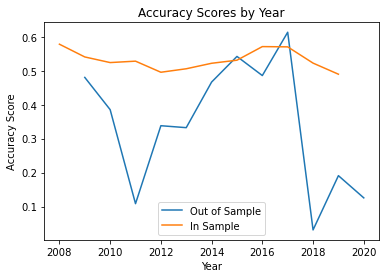

In [51]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
years_in_sample = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(years, accuracies, label='Out of Sample')
plt.plot(years_in_sample, accuracies_in_sample, label='In Sample')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores by Year')


Text(0.5, 1.0, 'Out of Sample F1 Scores by Year')

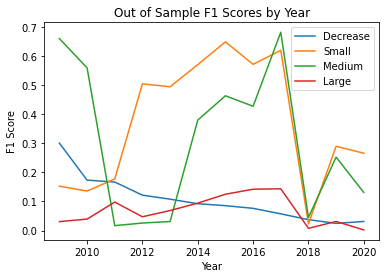

In [52]:
plt.plot(years, f1scores)
plt.legend(['Decrease','Small','Medium','Large'])
plt.xlabel('Year')
plt.ylabel('F1 Score')
plt.title('Out of Sample F1 Scores by Year')

Text(0.5, 1.0, 'In Sample F1 Scores by Year')

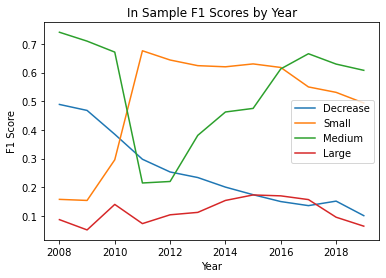

In [53]:
plt.plot(years_in_sample, f1scores_in_sample)
plt.legend(['Decrease','Small','Medium','Large'])
plt.xlabel('Year')
plt.ylabel('F1 Score')
plt.title('In Sample F1 Scores by Year')